# Required Imports and Constants

In [1]:
%matplotlib inline

import ast
import json
import os
import sys
from datetime import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import lines
from matplotlib import patches

from scipy.stats import f_oneway
from scipy.stats import ttest_1samp

import warnings
warnings.filterwarnings("ignore")


AYS_PIDS = [
      "0Odg8Ya9cQZM",
      "3Bl1l9qPo03v",
      "9BJDMrSg5GU2",
      "AtYKOM9xQoxo",
      "bvxCS2xslVD1",
      "bzdxtTFRW7bn",
      "Ck5zEa9jS8kr",
      "EPcW0vyMy901",
      "gzgUnyhhYvag",
      "kK7uC15Oxl7j",
      "WAiLZBXejqs6",
      "WBoN8OgUq9kM",
      "xrQxT9kE7trL",
]

SUM_PIDS = [
      "7YPaDt3k6zUJ",
      "9oAsM1Zsd2ZL",
      "BDsZoXY2KvCq",
      "cBx0ECEdnCXE",
      "DMMPwdh9JyIJ",
      "F8aaNjmqipm9",
      "iLi4QFTFUW6W",
      "KB4R9vQpgvDE",
      "n8dCqYoZqOtZ",
      "oa0dujnJJIQK",
      "Q3GODcr8rSU2",
      "Xb1da3tmq51s",
      "XK6R4nlN8DL9",
      "Xm4gLrMYjXLp",
]

RT_PIDS = [
      "3jCj03ExwbiR",
      "3LjPd26Bv20B",
      "7zspHOjpyZg6",
      "qBEgmP5F3go8",
      "RJozqLvmzUql",
      "SM3fpzR19vuY",
      "tqnTUO7mgIPw",
      "VSG8tghjg06Z",
      "wYKNw3brGUCM",
      "yJrWi90sw5Fv",
      "ZDOTBhGZ9oS9",
]

RTSUM_PIDS = [
      "1V7m8wY9JNak",
      "606gnDVdNwnt",
      "7UfOha66klmh",
      "DAn39rXtnCAS",
      "ggYz115dy0a9",
      "joO2OX6p9rr6",
      "rJwpqBcwhEar",
      "UPGk3s3Qldql",
      "vEiIrVSiezFn",
      "w6ptnTrqQi3D",
      "wJm4COpLVvz5",
      "zV0yHZRI3MH9"
]

ALL_PIDS = {
    'CTRL': AYS_PIDS,
    'SUM': SUM_PIDS,
    'RT': RT_PIDS,
    'RTSUM': RTSUM_PIDS,
}

# ANOVA - Average AD Metric Values - Compared Across Conditions - For Each Attribute

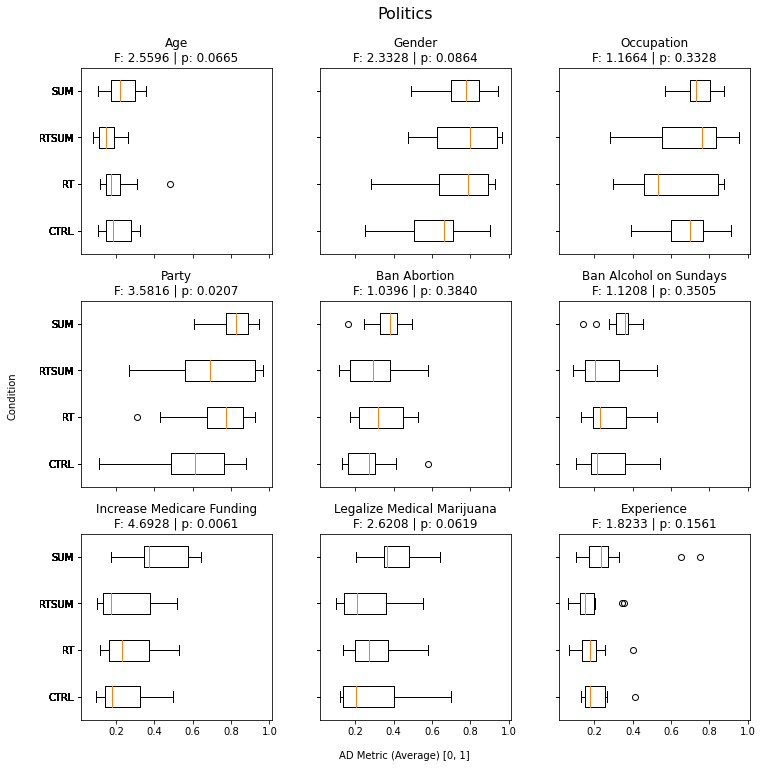

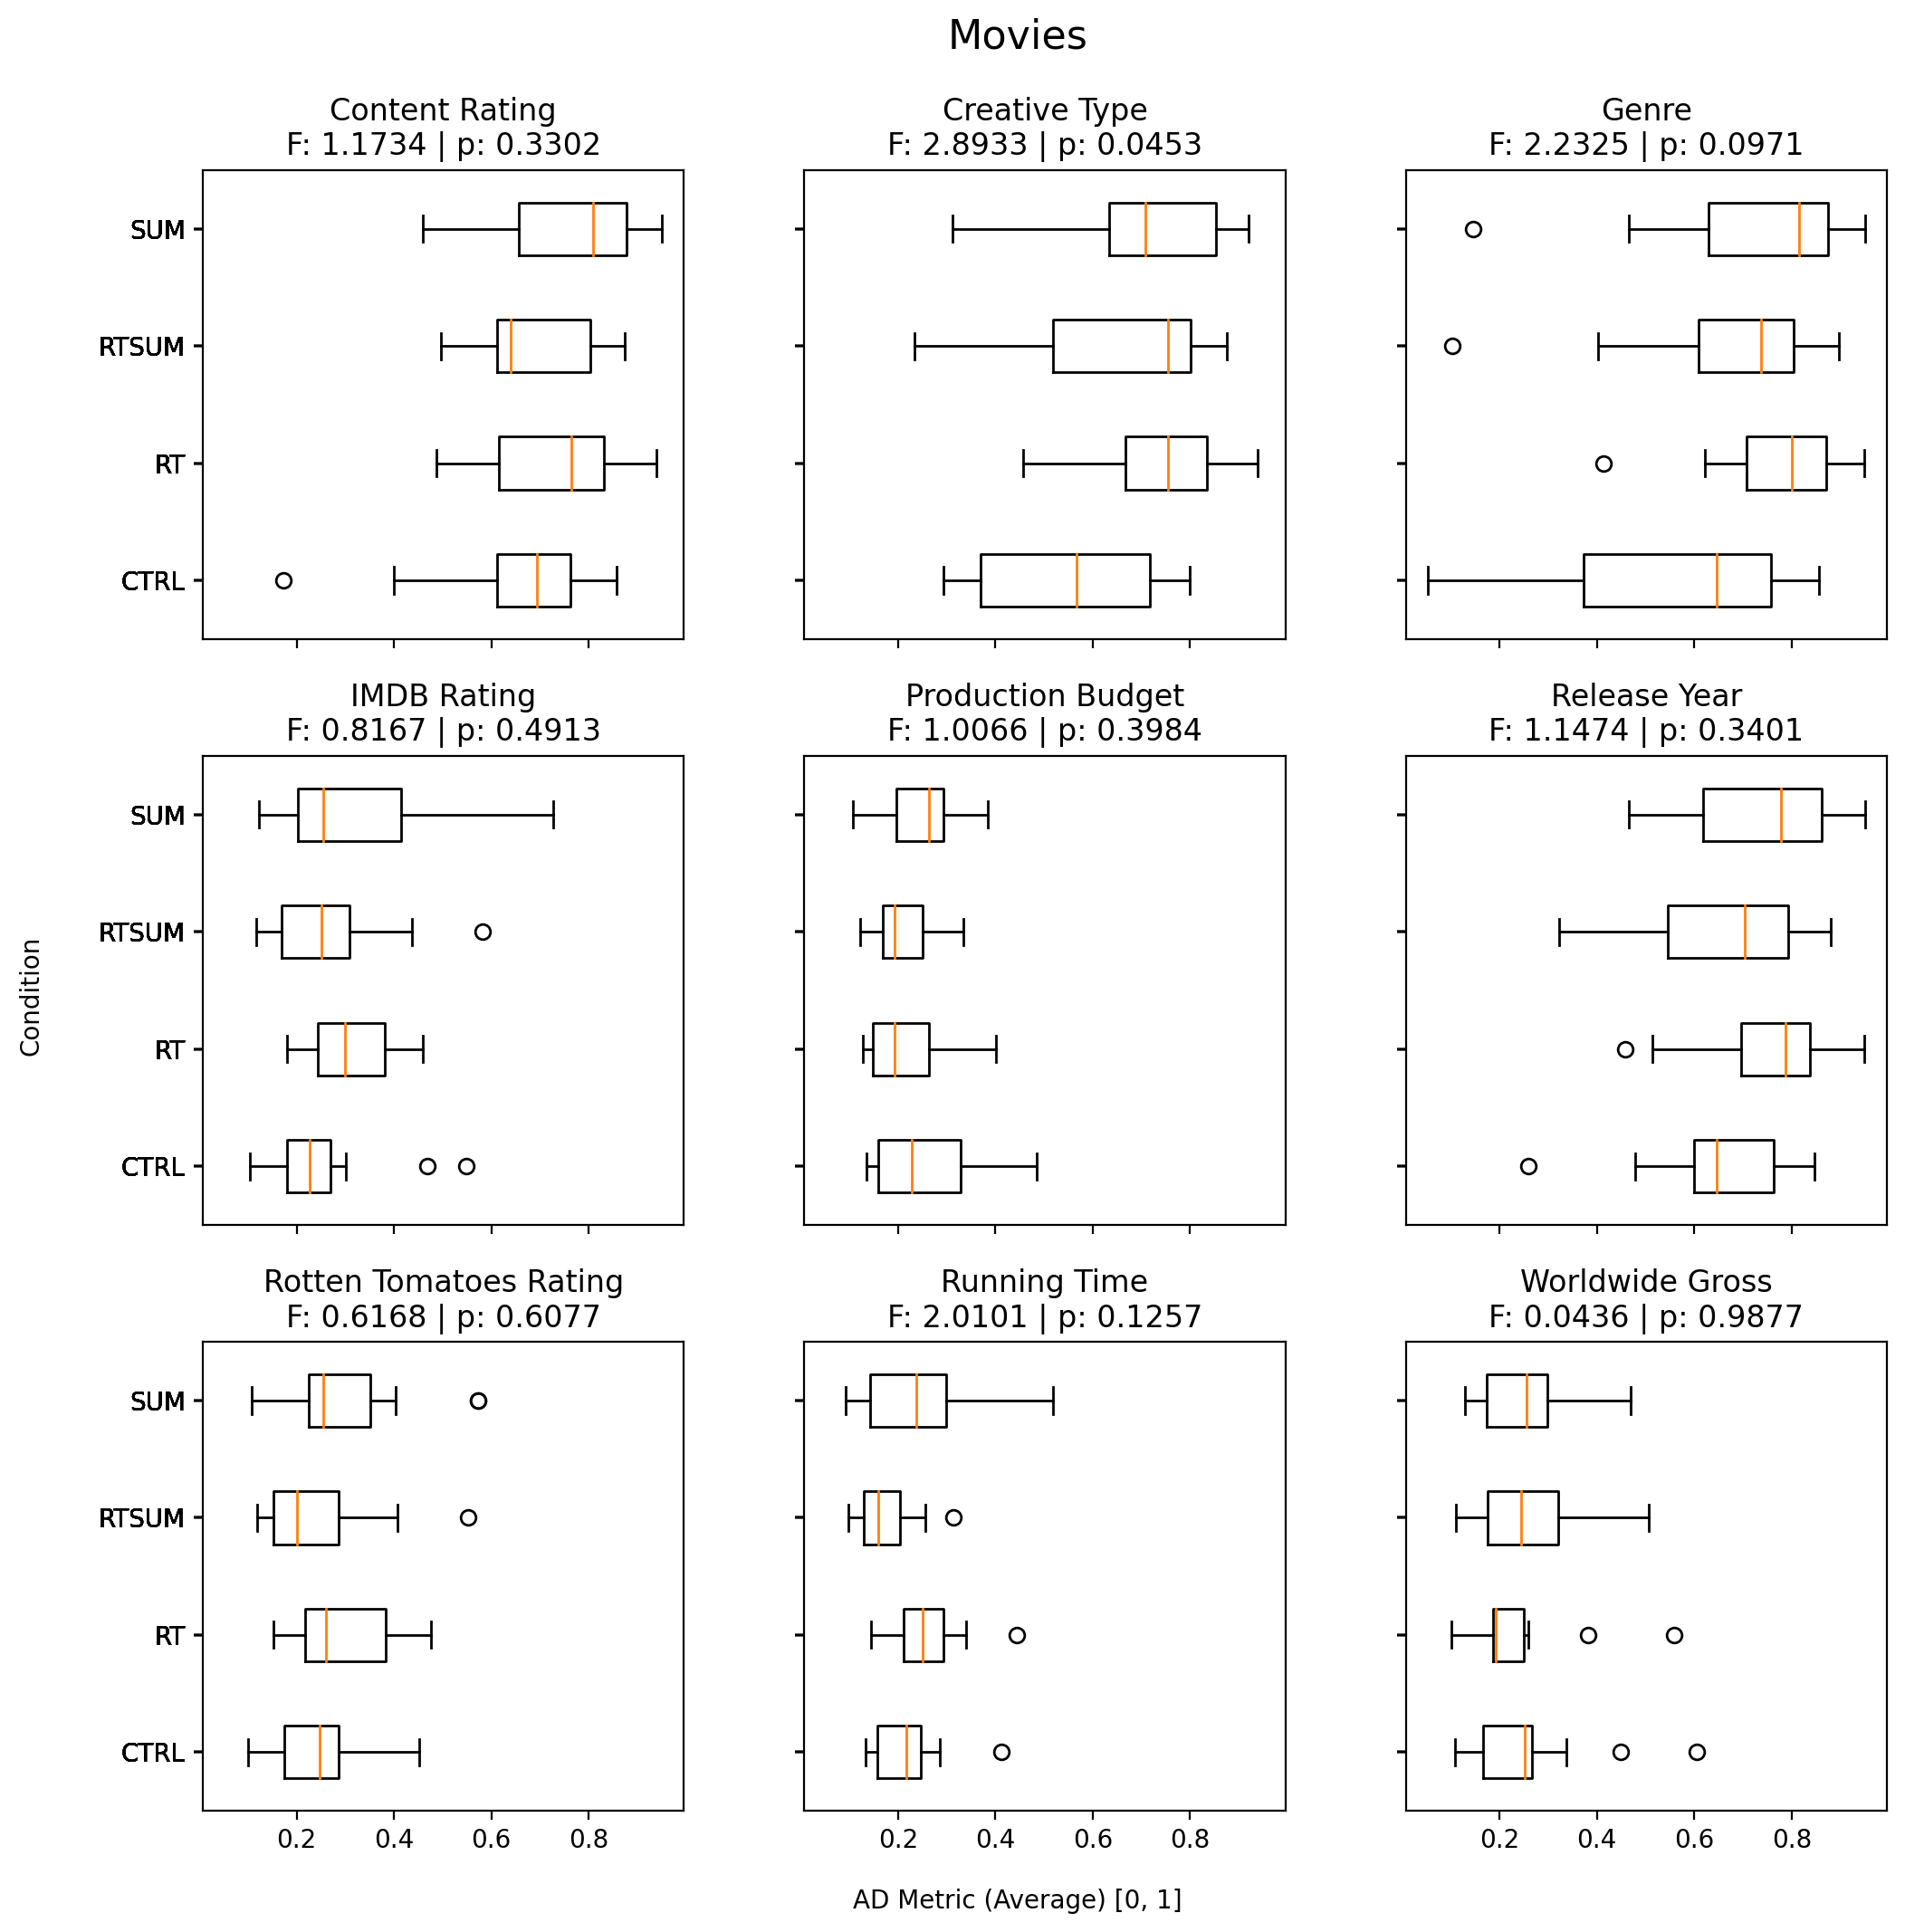

In [2]:
metric = "ad_metric_avg"

for task in ['politics', 'movies']:
    dfs = []
    for condition in ["CTRL", "SUM", "RT", "RTSUM"]:
        PIDS = ALL_PIDS[condition]
        for pid in PIDS:
            basepath = os.path.join(condition, pid)  # basepath for PID
            df = pd.read_csv(os.path.join(basepath, f"attr_stats_{task}.csv"))
            dfs.append(
                df.assign(PID=lambda x: pid).assign(Condition=lambda x: condition)[['PID', 'Condition', 'attribute', metric]]
            )


    # Combine into single DataFrame
    df_metric = pd.concat(dfs, ignore_index=True)


    ### PLOT ###

    plot_titles = {
        'politics': {
            'age': 'Age',
            'gender': 'Gender',
            'occupation': 'Occupation',
            'party': 'Party',
            'political_experience': 'Experience',
            'policy_strength_ban_abortion_after_6_weeks': 'Ban Abortion',
            'policy_strength_legalize_medical_marijuana': 'Legalize Medical Marijuana',
            'policy_strength_increase_medicare_funding': 'Increase Medicare Funding',
            'policy_strength_ban_alcohol_sales_sundays': 'Ban Alcohol on Sundays'
        },
        'movies': {
            "Running Time": "Running Time",
            "Production Budget": "Production Budget",
            "Worldwide Gross": "Worldwide Gross",
            "Rotten Tomatoes Rating": "Rotten Tomatoes Rating",
            "IMDB Rating": "IMDB Rating",
            "Genre": "Genre",
            "Creative Type": "Creative Type",
            "Content Rating": "Content Rating",
            "Release Year": "Release Year",
        }
    }

    total_rows = 3
    total_cols = 3
    fig, ax = plt.subplots(nrows=total_rows, ncols=total_rows, sharex=True, sharey=True, figsize=(12,12))
    plt.rcParams['figure.dpi'] = 200 # 200 e.g. is really fine, but slower

    countrow = 0
    countcol = 0
    for key, grp in df_metric.groupby(['attribute']):
        vals = grp.groupby('Condition')[metric].apply(list).tolist()
        # Perform ANOVA 1-way test
        f_stat, p_val = f_oneway(*vals)

        # Plot the summary
        ax_curr = ax[countrow][countcol]
        ax_curr.boxplot(vals, vert=False, labels=['CTRL', 'RT', 'RTSUM', 'SUM'])
        ax_curr.set_title(f"{plot_titles[task][key]}\nF: {f_stat:.04f} | p: {p_val:.04f}")
        countcol += 1
        if (countcol == total_cols):
            countcol = 0
            countrow += 1
            if (countrow == total_rows):
                break 

    xlabel_text = {
        'ad_metric_avg': 'AD Metric (Average) [0, 1]',
        'ad_metric_final': 'AD Metric (Final) [0, 1]',
        'ac_metric_avg': 'AC Metric (Average) [0, 1]',
        'ac_metric_final': 'AC Metric (Final) [0, 1]',
    }
    fig.text(0.5, 0.08, xlabel_text[metric], ha='center')
    fig.text(0.04, 0.5, 'Condition', va='center', rotation='vertical')

    fig.suptitle(task.capitalize(), x=0.5, y=0.95, fontsize=16)
    plt.subplots_adjust(hspace=0.25, wspace=0.25)
#     plt.savefig(f'charts/surprise/{task}/{task}_{metric}_by_condition.png', dpi=300, bbox_inches='tight')


# ANOVA - Average AD Metric Values - Compared Across Conditions - For Select Attributes

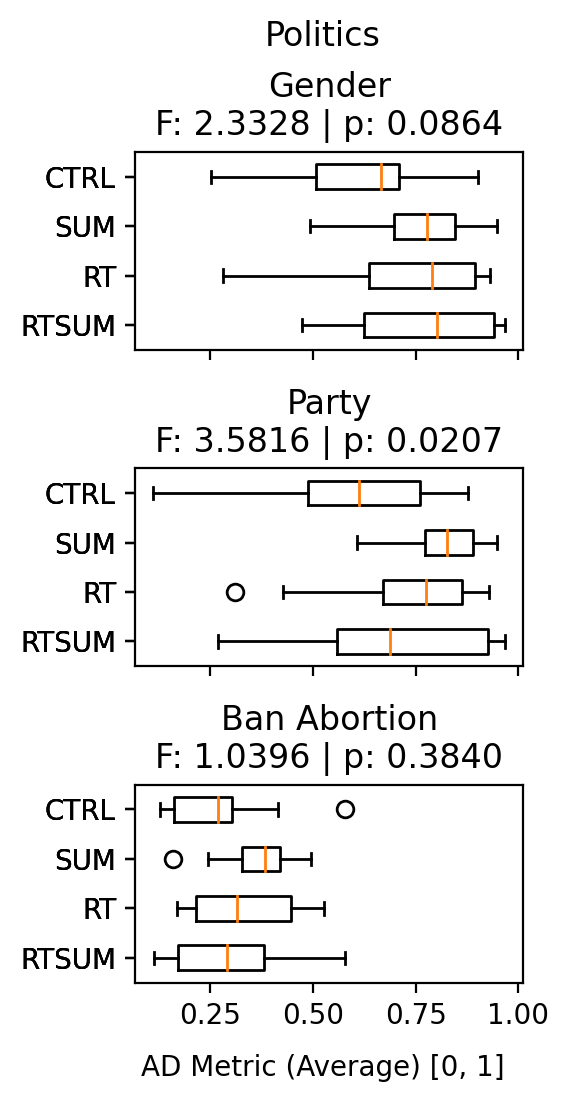

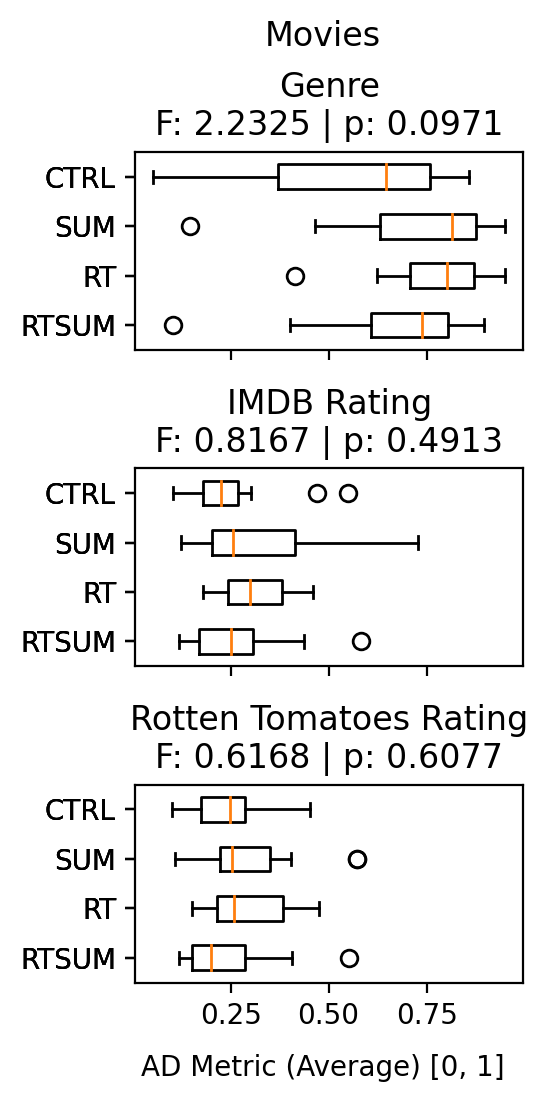

In [3]:
metric = "ad_metric_avg"
attrs = {
    'politics': ['gender', 'party', 'policy_strength_ban_abortion_after_6_weeks'],
    'movies': ['IMDB Rating', 'Genre', 'Rotten Tomatoes Rating'],
}

for task in ['politics', 'movies']:
    dfs = []
    for condition in ["CTRL", "SUM", "RT", "RTSUM"]:
        PIDS = ALL_PIDS[condition]
        for pid in PIDS:
            basepath = os.path.join(condition, pid)  # basepath for PID
            df = pd.read_csv(os.path.join(basepath, f"attr_stats_{task}.csv"))
            dfs.append(
                df.assign(PID=lambda x: pid)
                    .assign(Condition=lambda x: condition)[['PID', 'Condition', 'attribute', metric]]
            )


    # Combine into single DataFrame
    df_metric = pd.concat(dfs, ignore_index=True)
    df_metric = df_metric[df_metric['attribute'].isin(attrs[task])]


    ### PLOT ###

    labels = ['RTSUM', 'RT', 'SUM', 'CTRL']
    plot_titles = {
        'politics': {
            'age': 'Age',
            'gender': 'Gender',
            'occupation': 'Occupation',
            'party': 'Party',
            'political_experience': 'Experience',
            'policy_strength_ban_abortion_after_6_weeks': 'Ban Abortion',
            'policy_strength_legalize_medical_marijuana': 'Legalize Medical Marijuana',
            'policy_strength_increase_medicare_funding': 'Increase Medicare Funding',
            'policy_strength_ban_alcohol_sales_sundays': 'Ban Alcohol on Sundays'
        },
        'movies': {
            "Running Time": "Running Time",
            "Production Budget": "Production Budget",
            "Worldwide Gross": "Worldwide Gross",
            "Rotten Tomatoes Rating": "Rotten Tomatoes Rating",
            "IMDB Rating": "IMDB Rating",
            "Genre": "Genre",
            "Creative Type": "Creative Type",
            "Content Rating": "Content Rating",
            "Release Year": "Release Year",
        }
    }

    figsize = (2.5, 5.5)
    fig, ax = plt.subplots(nrows=3, sharex=True, sharey=True, figsize=figsize)
    plt.rcParams['figure.dpi'] = 200 # 200 e.g. is really fine, but slower

    countrow = 0
    for key, grp in df_metric.groupby(['attribute']):
        # Get vals
        vals = grp.groupby('Condition')[metric].apply(list).reindex(labels).tolist()

        # Perform ANOVA 1-way test
        f_stat, p_val = f_oneway(*vals)

        # Plot the summary
        ax_curr = ax[countrow]
        ax_curr.boxplot(vals, vert=False, labels=labels, widths=[0.5 for _ in range(len(labels))])
        ax_curr.set_title(f"{plot_titles[task][key]}\nF: {f_stat:.04f} | p: {p_val:.04f}")
        countrow += 1

    xlabel_text = {
        'ad_metric_avg': 'AD Metric (Average) [0, 1]',
        'ad_metric_final': 'AD Metric (Final) [0, 1]',
        'ac_metric_avg': 'AC Metric (Average) [0, 1]',
        'ac_metric_final': 'AC Metric (Final) [0, 1]',
    }

    fig.text(0.5, 0.04, xlabel_text[metric], ha='center')
    plt.subplots_adjust(hspace=0.6)
    fig.suptitle(task.capitalize(), x=0.5, y=1.0, fontsize=12)
    
#     plt.savefig(f'charts/surprise/{task}/{task}_{metric}_by_condition_PAPER.png', dpi=300, bbox_inches='tight')


# ANOVA - Average DPD Metric values - Compared across Conditions

In [4]:
metric = "dpd_metric_avg"

for task in ['politics', 'movies']:
    print(f"=== {task.capitalize()} ===")
    dfs = []
    for condition in ["CTRL", "SUM", "RT", "RTSUM"]:
        PIDS = ALL_PIDS[condition]
        for pid in PIDS:
            basepath = os.path.join(condition, pid)  # basepath for PID
            df = pd.read_csv(os.path.join(basepath, f"attr_stats_{task}.csv"))
            dfs.append(
                df.assign(PID=lambda x: pid).assign(Condition=lambda x: condition)[['PID', 'Condition', 'attribute', metric]]
            )


    # Combine into single DataFrame
    df_metric = pd.concat(dfs, ignore_index=True)
    dpd_metric = df_metric.groupby(['PID', 'Condition'])[metric].apply(list).map(lambda x: x[0]).reset_index()

    # Show 5 number summary
    desc = print(dpd_metric.groupby(['Condition']).describe())
    print()

    # Perform ANOVA 1-way test
    vals = dpd_metric.groupby(['Condition'])[metric].apply(list).tolist()
    f_stat, p_val = f_oneway(*vals)
    print(f"ANOVA[Condition]\t|\tF Statistic: {f_stat:.04f}\t|\tp-value: {p_val:.04f}")
    print()

=== Politics ===
          dpd_metric_avg                                                    \
                   count      mean       std       min       25%       50%   
Condition                                                                    
CTRL                13.0  0.758214  0.096544  0.590909  0.700000  0.763074   
RT                  11.0  0.834166  0.097247  0.666667  0.790117  0.863636   
RTSUM               12.0  0.831250  0.131365  0.590909  0.775332  0.878471   
SUM                 14.0  0.844565  0.092386  0.608696  0.805389  0.861234   

                               
                75%       max  
Condition                      
CTRL       0.790698  0.912621  
RT         0.905656  0.932836  
RTSUM      0.935861  0.967784  
SUM        0.898876  0.948156  

ANOVA[Condition]	|	F Statistic: 1.8512	|	p-value: 0.1512

=== Movies ===
          dpd_metric_avg                                                    \
                   count      mean       std       min      

# ANOVA - Changes Made To Selections After Revisions - Compared Across Conditions

In [5]:
row_index = {
    'politics': 1,
    'movies': 0,
}
rows = []

for task in ['politics', 'movies']:
    print(f"=== {task.capitalize()} ===")
    for condition in ["CTRL", "SUM", "RT", "RTSUM"]:
        PIDS = ALL_PIDS[condition]
        for pid in PIDS:
            basepath = os.path.join(condition, pid)  # basepath for PID
            try:
                df = pd.read_csv(os.path.join(basepath, f"task_PM.csv"))
                appOrder = "PM"
            except FileNotFoundError:
                df = pd.read_csv(os.path.join(basepath, f"task_MP.csv"))
                appOrder = "MP"

            drop_cols = [
                'selected',
                'timesVisited',
                'sizeVar',
                'xVar',
                'yVar',
                'jitter_x',
                'jitter_y',
            ]

            ### Get Ratio Of by Phase ###

            # Phase 1
            selection_phase_1 = (
                df[df['task'] == task]['selection_phase_1'].map(lambda x: ast.literal_eval(str(x)))
                    .apply(pd.Series).T[row_index[task]]
                    .map(lambda x: ast.literal_eval(str(x)))
                    .apply(pd.Series)
                    .drop(columns=drop_cols)
                    .reset_index(drop=True)
            )

            # Phase 2
            selection_phase_2 = (
                df[df['task'] == task]['selection_phase_2'].map(lambda x: ast.literal_eval(str(x)))
                    .apply(pd.Series).T[row_index[task]]
                    .map(lambda x: ast.literal_eval(str(x)))
                    .apply(pd.Series)
                    .drop(columns=drop_cols)
                    .reset_index(drop=True)
            )

            # get ratio
            nchanged = 10 - len(set(selection_phase_1['id']) & set(selection_phase_2['id']))
            rows.append([pid, condition, nchanged])


    # Combine phase 1 and 2 into single dataframe
    df_nchanged = pd.DataFrame(
        rows,
        columns=['PID', 'Condition', '# Selections Changed']
    )

    # Show 5 number summary
    print(df_nchanged.groupby('Condition').describe())
    print()
    
    # Perform ANOVA 1-way test
    vals = df_nchanged.groupby('Condition')['# Selections Changed'].apply(list).tolist()
    f_stat, p_val = f_oneway(*vals)
    print(f"ANOVA[Condition]\t|\tF Statistic: {f_stat:.04f}\t|\tp-value: {p_val:.04f}")
    print()


=== Politics ===
          # Selections Changed                                              
                         count      mean       std  min  25%  50%   75%  max
Condition                                                                   
CTRL                      13.0  0.461538  0.660225  0.0  0.0  0.0  1.00  2.0
RT                        11.0  0.363636  0.924416  0.0  0.0  0.0  0.00  3.0
RTSUM                     12.0  1.916667  2.466441  0.0  0.0  1.5  2.25  8.0
SUM                       14.0  1.428571  1.869360  0.0  0.0  0.5  2.00  6.0

ANOVA[Condition]	|	F Statistic: 2.5164	|	p-value: 0.0699

=== Movies ===
          # Selections Changed                                             
                         count      mean       std  min  25%  50%  75%  max
Condition                                                                  
CTRL                      26.0  0.423077  0.757526  0.0  0.0  0.0  1.0  3.0
RT                        22.0  0.681818  1.323285  0.0  0.0  0.0 

# ANOVA - Interactions Made During Revisions - Compared Across Conditions

In [6]:
# Set these
task = "movies"

rows = []

for task in ['politics', 'movies']:
    print(f"=== {task.capitalize()} ===")
    for condition in ["CTRL", "SUM", "RT", "RTSUM"]:
        PIDS = ALL_PIDS[condition]
        for pid in PIDS:
            basepath = os.path.join(condition, pid)  # basepath for PID
            df = pd.read_csv(os.path.join(basepath, f"interaction.csv"))
            df_task = df[df['appMode'] == task].reset_index(drop=True)

            idx1 = df_task[df_task['interactionType'] == 'click_submit_button_revise'].index.tolist()[0]
            idx2 = df_task[df_task['interactionType'] == 'click_submit_button_final'].index.tolist()[0]
            nrevisions = len(df_task.iloc[idx1+1:idx2].index)

            rows.append([pid, condition, nrevisions])


    # Combine into single DataFrame
    df_nchanged = pd.DataFrame(
        rows,
        columns=['PID', 'Condition', '# Interactions Made During Revisions']
    )

    # Show 5 number summary
    print(df_nchanged.groupby('Condition').describe())
    print()
    
    # Perform ANOVA 1-way test
    vals = df_nchanged.groupby('Condition')['# Interactions Made During Revisions'].apply(list).tolist()
    f_stat, p_val = f_oneway(*vals)
    print(f"ANOVA[Condition]\t|\tF Statistic: {f_stat:.04f}\t|\tp-value: {p_val:.04f}")
    print()

=== Politics ===
          # Interactions Made During Revisions                             \
                                         count       mean        std  min   
Condition                                                                   
CTRL                                      13.0   8.000000   8.640988  0.0   
RT                                        11.0  23.909091  40.766296  0.0   
RTSUM                                     12.0  81.083333  92.966718  0.0   
SUM                                       14.0  44.785714  51.324276  0.0   

                                     
           25%   50%     75%    max  
Condition                            
CTRL       0.0   5.0   16.00   25.0  
RT         0.0   0.0   38.00  100.0  
RTSUM      2.0  65.0  119.75  299.0  
SUM        2.5  26.5   82.75  170.0  

ANOVA[Condition]	|	F Statistic: 3.8339	|	p-value: 0.0156

=== Movies ===
          # Interactions Made During Revisions                             \
                          